In [243]:
#https://neuropsychology.github.io/NeuroKit/
#pip install neurokit2

In [244]:
##Note: Kindly note that this represents an abbreviated and simplified version of our analysis, based on a small subsample.
##Data for this analysis were collected from an ongoing project implemented in PsychoPy.
##If further information is needed, do not hesitate to reach out: daylin.gongora@maastrichtuniversity.nl

In [245]:
##import packages
import pandas as pd
import numpy as np
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import os
import neurokit2 as nk
import mne
from pathlib import Path
from scipy.stats import shapiro,spearmanr
import warnings
warnings.filterwarnings("ignore")

In [246]:
##function to create path
def construct_path(folders):
    if folders[0].endswith(":"):
        return Path(folders[0] + os.sep).joinpath(*folders[1:])
    else:
        return Path(*folders)

rootDirObj = construct_path(['D:', '07_Raw_data'])

if (rootDirObj.exists() == False or rootDirObj.is_dir() == False):
    raise Exception(f'Path does not exists or is not a directory. {str(rootDirObj)}')

rootDir = str(rootDirObj)
rootDir

'D:\\07_Raw_data'

In [247]:
##list of participants
regex = construct_path([rootDir, '*'])
files = glob(str(regex) + os.sep, recursive = True)
clean_files= []
first_pilot = ['P01fMRI','P02fMRI','P05fMRI','P06fMRI','P07fMRI','P08fMRI','P09fMRI','P10fMRI']
for name in files:
    if name[15:-1] in first_pilot: 
        clean_files.append(name) 
clean_files

['D:\\07_Raw_data\\P01fMRI\\',
 'D:\\07_Raw_data\\P02fMRI\\',
 'D:\\07_Raw_data\\P05fMRI\\',
 'D:\\07_Raw_data\\P06fMRI\\',
 'D:\\07_Raw_data\\P07fMRI\\',
 'D:\\07_Raw_data\\P08fMRI\\',
 'D:\\07_Raw_data\\P09fMRI\\',
 'D:\\07_Raw_data\\P10fMRI\\']

In [248]:
##function for loading all the scr files paths for all the participants
def list_subj_scr_data(file_path):
    ##getting responses
    scr_files = []
    for path in file_path:
        regex = construct_path([path, 'SCR', 'MainProtocol', '*_MainProtocol_*'])
        temp = glob(str(regex))
        scr_files.append(temp)
    #list to dataframe of path
    list_files = pd.DataFrame()
    for j in scr_files:
        temp2 = pd.DataFrame({'path': j})
        list_files = pd.concat([list_files,temp2], axis =0)
    list_files.reset_index(drop = True, inplace = True)
    #selecting the recording files
    idx = list_files['path'].str.find('.vhdr')
    scr_filesc = list_files[idx > 0]
    scr_filesc.reset_index(drop = True, inplace = True)
    return scr_filesc

In [249]:
##listing all the scr files
final_scr_files = list_subj_scr_data(clean_files)
final_scr_files

,path
0,D:\07_Raw_data\P01fMRI\SCR\MainProtocol\P01fMR...
1,D:\07_Raw_data\P01fMRI\SCR\MainProtocol\P01fMR...
2,D:\07_Raw_data\P01fMRI\SCR\MainProtocol\P01fMR...
3,D:\07_Raw_data\P02fMRI\SCR\MainProtocol\P02fMR...
4,D:\07_Raw_data\P02fMRI\SCR\MainProtocol\P02fMR...
5,D:\07_Raw_data\P02fMRI\SCR\MainProtocol\P02fMR...
6,D:\07_Raw_data\P02fMRI\SCR\MainProtocol\P02fMR...
7,D:\07_Raw_data\P02fMRI\SCR\MainProtocol\P02fMR...
8,D:\07_Raw_data\P05fMRI\SCR\MainProtocol\P05fMR...
9,D:\07_Raw_data\P05fMRI\SCR\MainProtocol\P05fMR...


In [250]:
##Procesing EDA signal
##Define time window around each event (in seconds) - params for epochs
epochs_start = -0.1  # Time before the event
epochs_end = 7 # Time after the event
sampling_rate = 1000

for p in np.arange(0, len(final_scr_files)):
    
    vhdr_file_path = final_scr_files["path"].iloc[p];
    
    # loading onsets and labels
    onsets = pd.read_csv(vhdr_file_path[:-5] + '_onsets.csv')
    conditions_id = pd.read_csv(vhdr_file_path[:-7] + '_conditions_id.csv')
    label_names = onsets.merge(conditions_id, right_on = 'Value', left_on = '2')
    label_names.sort_values(by = '0', inplace = True)
    
    # Load Brain Vision data (.vhdr file)
    raw = mne.io.read_raw_brainvision(vhdr_file_path, preload=True)
    # Convert to a format that NeuroKit2 can use (e.g., numpy array)
    eda_signal = raw.get_data()
    # Process the raw EDA signal and create report for visual inspection
    report_file_path = str(vhdr_file_path[:-5] + '_report.html')
    data_clean, info = nk.eda_process(eda_signal[0], sampling_rate=sampling_rate, report = report_file_path)
    
    #creating events
    events = nk.events_create(event_onsets =  np.array(onsets['0']),
                          event_conditions=np.array(label_names['Key']).tolist())
    #Epoch the signal around event markers
    epochs = nk.epochs_create(data_clean, events=events, 
                       epochs_start=epochs_start, epochs_end=epochs_end,
                       sampling_rate=sampling_rate,baseline_correction=True)       
    #Analyzing data based on epoch and saving to df
    df = nk.bio_analyze(epochs, sampling_rate=sampling_rate, method = 'event-related')  
    #preparing the dataframe for posthoc analysis
    df = df[['Condition','SCR_Peak_Amplitude','SCR_Peak_Amplitude_Time']]
    df['PID'] = vhdr_file_path[-27:-20]
    df['PID'] = df['PID'].str.lstrip('l\\')
    df['round'] = vhdr_file_path[-6:-5]
    df['trial'] = np.append(np.nan,np.repeat(np.arange(0,30),4)) #4 port signals
    df.to_csv(vhdr_file_path[:-7] + '_SCR' + '_' + vhdr_file_path[-6:-5] + '.csv')

Extracting parameters from D:\07_Raw_data\P01fMRI\SCR\MainProtocol\P01fMRI_MainProtocol_3.vhdr...
Setting channel info structure...
Reading 0 ... 634939  =      0.000 ...   634.939 secs...
The raw signal, sampled at 1000 Hz, was cleaned using the default method of the neurokit2 package.

The signal was decomposed into phasic and tonic components using the method described in neurokit.

The cleaned signal was used to detect peaks using the default method of the `neurokit2` package.



References
- https://doi.org/10.21105/joss.01667
The report has been saved to D:\07_Raw_data\P01fMRI\SCR\MainProtocol\P01fMRI_MainProtocol_3_report.html
Extracting parameters from D:\07_Raw_data\P01fMRI\SCR\MainProtocol\P01fMRI_MainProtocol_4.vhdr...
Setting channel info structure...
Reading 0 ... 711099  =      0.000 ...   711.099 secs...
The raw signal, sampled at 1000 Hz, was cleaned using the default method of the neurokit2 package.

The signal was decomposed into phasic and tonic components using the 

The report has been saved to //ca-um-nas201/fpn_rdm$/DM2249_CQ_NeuralUnderpinning/07_Raw_data\P18\SCR/MainProtocol\P18_MainProtocol_4_report.html
Extracting parameters from //ca-um-nas201/fpn_rdm$/DM2249_CQ_NeuralUnderpinning/07_Raw_data\P18\SCR/MainProtocol\P18_MainProtocol_6.vhdr...
Setting channel info structure...
Reading 0 ... 477239  =      0.000 ...   477.239 secs...
The raw signal, sampled at 1000 Hz, was cleaned using the default method of the neurokit2 package.

The signal was decomposed into phasic and tonic components using the method described in neurokit.

The cleaned signal was used to detect peaks using the default method of the `neurokit2` package.



References
- https://doi.org/10.21105/joss.01667
The report has been saved to //ca-um-nas201/fpn_rdm$/DM2249_CQ_NeuralUnderpinning/07_Raw_data\P18\SCR/MainProtocol\P18_MainProtocol_6_report.html
Extracting parameters from //ca-um-nas201/fpn_rdm$/DM2249_CQ_NeuralUnderpinning/07_Raw_data\P19\SCR/MainProtocol\P19_MainProtoco

Setting channel info structure...
Reading 0 ... 482559  =      0.000 ...   482.559 secs...
The raw signal, sampled at 1000 Hz, was cleaned using the default method of the neurokit2 package.

The signal was decomposed into phasic and tonic components using the method described in neurokit.

The cleaned signal was used to detect peaks using the default method of the `neurokit2` package.



References
- https://doi.org/10.21105/joss.01667
The report has been saved to //ca-um-nas201/fpn_rdm$/DM2249_CQ_NeuralUnderpinning/07_Raw_data\P20\SCR/MainProtocol\P20_MainProtocol_5_report.html
Extracting parameters from //ca-um-nas201/fpn_rdm$/DM2249_CQ_NeuralUnderpinning/07_Raw_data\P20\SCR/MainProtocol\P20_MainProtocol_6.vhdr...
Setting channel info structure...
Reading 0 ... 563859  =      0.000 ...   563.859 secs...
The raw signal, sampled at 1000 Hz, was cleaned using the default method of the neurokit2 package.

The signal was decomposed into phasic and tonic components using the method describ

The report has been saved to //ca-um-nas201/fpn_rdm$/DM2249_CQ_NeuralUnderpinning/07_Raw_data\P22\SCR/MainProtocol\P22_MainProtocol_6_report.html
Extracting parameters from //ca-um-nas201/fpn_rdm$/DM2249_CQ_NeuralUnderpinning/07_Raw_data\P23\SCR/MainProtocol\P23_MainProtocol_1.vhdr...
Setting channel info structure...
Reading 0 ... 471159  =      0.000 ...   471.159 secs...
The raw signal, sampled at 1000 Hz, was cleaned using the default method of the neurokit2 package.

The signal was decomposed into phasic and tonic components using the method described in neurokit.

The cleaned signal was used to detect peaks using the default method of the `neurokit2` package.



References
- https://doi.org/10.21105/joss.01667
The report has been saved to //ca-um-nas201/fpn_rdm$/DM2249_CQ_NeuralUnderpinning/07_Raw_data\P23\SCR/MainProtocol\P23_MainProtocol_1_report.html
Extracting parameters from //ca-um-nas201/fpn_rdm$/DM2249_CQ_NeuralUnderpinning/07_Raw_data\P23\SCR/MainProtocol\P23_MainProtoco

Setting channel info structure...
Reading 0 ... 500139  =      0.000 ...   500.139 secs...
The raw signal, sampled at 1000 Hz, was cleaned using the default method of the neurokit2 package.

The signal was decomposed into phasic and tonic components using the method described in neurokit.

The cleaned signal was used to detect peaks using the default method of the `neurokit2` package.



References
- https://doi.org/10.21105/joss.01667
The report has been saved to //ca-um-nas201/fpn_rdm$/DM2249_CQ_NeuralUnderpinning/07_Raw_data\P24\SCR/MainProtocol\P24_MainProtocol_6_report.html
Extracting parameters from //ca-um-nas201/fpn_rdm$/DM2249_CQ_NeuralUnderpinning/07_Raw_data\P25\SCR/MainProtocol\P25_MainProtocol_1.vhdr...
Setting channel info structure...
Reading 0 ... 511279  =      0.000 ...   511.279 secs...
The raw signal, sampled at 1000 Hz, was cleaned using the default method of the neurokit2 package.

The signal was decomposed into phasic and tonic components using the method describ

In [251]:
##reading all the csv to make a unique df
alldf = pd.DataFrame()
for i in clean_files: 
    regex = construct_path([i, 'SCR', 'MainProtocol', '*_MainProtocol_SCR_*'])
    temp_files = glob(str(regex))   
    for file_path in temp_files:
        temp = pd.read_csv(file_path)
        alldf = pd.concat([alldf, temp], axis=0, ignore_index=True)
alldf.sort_values(by = ['PID','round','Unnamed: 0'], inplace = True)

In [252]:
alldf.head()

,Unnamed: 0,Condition,SCR_Peak_Amplitude,SCR_Peak_Amplitude_Time,PID,round,trial
0,1,Instructions,NaN,NaN,P01fMRI,3,NaN
87,2,FixPoint_Safe,4.090532e-06,5.499789,P01fMRI,3,21.0
86,3,CondInfo_Safe,4.090532e-06,2.499366,P01fMRI,3,21.0
85,4,Task_Safe,5.448384e-07,0.663107,P01fMRI,3,21.0
84,5,Outcome_Safe,NaN,NaN,P01fMRI,3,20.0


In [253]:
##Deleting bad subjects/sessions after visual inspection
P02fMRIbad = alldf[(alldf['PID'] == 'P02fMRI') & (alldf['round'].isin([5]))] 
P03fMRIbad = alldf[(alldf['PID'] == 'P03fMRI') & (alldf['round'].isin([5,6]))] 
P04fMRIbad = alldf[(alldf['PID'] == 'P04fMRI')] 
P07fMRIbad = alldf[(alldf['PID'] == 'P07fMRI') & (alldf['round'].isin([5, 6]))]
P09fMRIbad = alldf[(alldf['PID'] == 'P09fMRI') & (alldf['round'].isin([3, 4, 5, 6]))]

# Combine all bad indices into one set
bad_indices = (
    P02fMRIbad.index.union(P03fMRIbad.index)
    .union(P04fMRIbad.index)
    .union(P07fMRIbad.index)
    .union(P09fMRIbad.index)
)

# Create clean dataframe by excluding all bad indices
clean_alldf = alldf.loc[~alldf.index.isin(bad_indices)].reset_index(drop=True)
clean_alldf.reset_index(drop = True, inplace = True)
#clean_alldf.to_csv('C:/Users/Administrator/Dropbox/Proj_BackUncert_ProsocBehav/Stimulation_protocols/SCR_df_fMRIPilot_clean_Ibn_Sina.csv')

In [254]:
#loading dataframe
#clean_alldf = pd.read_csv('C:/Users/Administrator/Dropbox/Proj_BackUncert_ProsocBehav/Stimulation_protocols/SCR_df_fMRIPilot_clean_Ibn_Sina.csv')
#filtering small amplitudes
#clean_alldf = clean_alldf[clean_alldf['SCR_Peak_Amplitude']>0.02e-6]
##updating round to match behavioral datafile
clean_alldf['round'] = clean_alldf['round'].apply(lambda x: x - 1)

##detecting irresponsive subjects (by condition)
#counting SCR per condition
countingSCR = clean_alldf.groupby(['PID','Condition'])['Condition'].count()
#reset index to convert the result into a DataFrame
countingSCR = countingSCR.reset_index(name='Condition_Count')
#identifying participants with more than 2 SCR (relaxed for abbreviated version)  
pp = countingSCR[(countingSCR['Condition_Count']>2) & (countingSCR['Condition'].str.contains('_', na=False))]['PID'].unique()
responsive_pp = countingSCR[countingSCR['PID'].isin(pp)]
pp = responsive_pp['PID'].unique()
responsive_pp = clean_alldf[clean_alldf['PID'].isin(pp)]
clean_alldf = responsive_pp.copy()
##counting the remaining participants
len(pp)

8

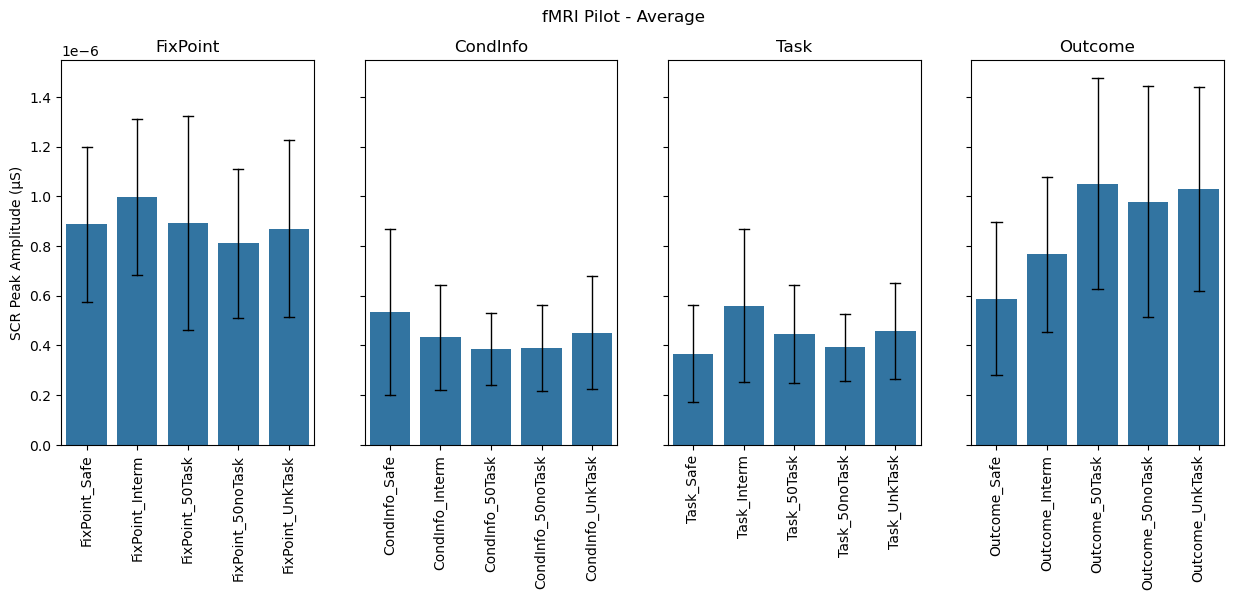

In [255]:
#average SCR peak by screen by condition
fig, ax = plt.subplots(1,4, figsize=(15,5), sharex = False, sharey = True)
#fig.tight_layout()
fig.suptitle('fMRI Pilot - Average')
names = ['FixPoint','CondInfo','Task','Outcome']
for p in np.arange(0,len(names)):  
    temp = clean_alldf[clean_alldf['Condition'].str.contains(names[p])].groupby(['PID','Condition'],as_index = False)['SCR_Peak_Amplitude'].mean()
    condition_order = [names[p]+'_Safe', names[p]+'_Interm', names[p]+ '_50Task', names[p]+'_50noTask', names[p]+'_UnkTask']
    temp['Condition'] = pd.Categorical(temp['Condition'], categories=condition_order, ordered=True)
    
    sns.barplot(x = 'Condition', y = 'SCR_Peak_Amplitude', data = temp, capsize=.2,\
        err_kws={"color": "0", "linewidth": 1}, estimator = 'mean', errorbar = 'se', ax = ax[p])
    # Rotate x-ticks for better visibility on the individual axes
    ax[p].set_xticklabels(ax[p].get_xticklabels(), rotation=90)    
    ax[p].set_xlabel('')
    ax[p].set_title(names[p])
    ax[p].set_ylabel('SCR Peak Amplitude (µS)')

In [256]:
##creating column for merging - Only the data during the screen 'CondInfo'
preparing_cond = clean_alldf[clean_alldf['Condition'].str.contains('CondInfo', na=False)]
preparing_cond['cond_SCR'] = preparing_cond.apply(lambda x: 'Safe' if x['Condition'] == 'CondInfo_Safe' 
                                         else 'Interm_100' if x['Condition'] == 'CondInfo_Interm' 
                                         else 'Severe_50_task' if x['Condition'] == 'CondInfo_50Task' 
                                         else 'Severe_50_notask' if x['Condition'] == 'CondInfo_50noTask' 
                                         else 'Severe_unknown' if x['Condition'] == 'CondInfo_UnkTask' 
                                         else None, axis=1)
#adjusting columns to match the behavioral records
preparing_cond['round'] = preparing_cond['round'].apply(lambda x: x - 1)
preparing_cond.rename(columns = {'PID':'participant', 'cond_SCR':'cond_name', 'trial': 'trials.thisN'}, inplace = True)

In [257]:
preparing_cond.head(5)

,Unnamed: 0.1,Unnamed: 0,Condition,SCR_Peak_Amplitude,SCR_Peak_Amplitude_Time,participant,round,trials.thisN,cond_name
2,2,3,CondInfo_Safe,0.000004,2.499366,P01fMRI,1,21.0,Safe
6,6,7,CondInfo_Interm,NaN,NaN,P01fMRI,1,20.0,Interm_100
10,10,11,CondInfo_50Task,NaN,NaN,P01fMRI,1,19.0,Severe_50_task
14,14,15,CondInfo_UnkTask,0.000004,0.134033,P01fMRI,1,18.0,Severe_unknown
18,18,19,CondInfo_Safe,NaN,NaN,P01fMRI,1,17.0,Safe


In [258]:
##Loading behavioral responses 
beha = pd.read_excel('C:/Users/Administrator/Dropbox/Proj_BackUncert_ProsocBehav/Stimulation_protocols/Behavior_df_BS_Ibn_Sina.xlsx')#update the path to the file
df = pd.merge(beha,preparing_cond, on = ['participant','cond_name','round','trials.thisN'], how ='left')
df.head(5)

,Unnamed: 0_x,max_no_trials,max_thres,participant,interm_no_trials,interm_thres,cond_file,cond_name,trials.thisRepN,trials.thisTrialN,...,cond_name_prev,Unnamed: 132,given,earned,given_prev,Unnamed: 0.1,Unnamed: 0_y,Condition,SCR_Peak_Amplitude,SCR_Peak_Amplitude_Time
0,0,5,4.5,P01fMRI,4,2.68152,D:/Brain_and_Decision/Protocols_fMRI/3_Main_Pr...,Severe_50_notask,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,5,4.5,P01fMRI,4,2.68152,D:/Brain_and_Decision/Protocols_fMRI/3_Main_Pr...,Safe,0,1,...,Severe_50_notask,NaN,4.0,21.1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5,4.5,P01fMRI,4,2.68152,D:/Brain_and_Decision/Protocols_fMRI/3_Main_Pr...,Severe_unknown,0,2,...,Safe,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
3,3,5,4.5,P01fMRI,4,2.68152,D:/Brain_and_Decision/Protocols_fMRI/3_Main_Pr...,Interm_100,0,3,...,Severe_unknown,NaN,5.0,26.8,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,4.5,P01fMRI,4,2.68152,D:/Brain_and_Decision/Protocols_fMRI/3_Main_Pr...,Severe_50_task,0,4,...,Interm_100,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN


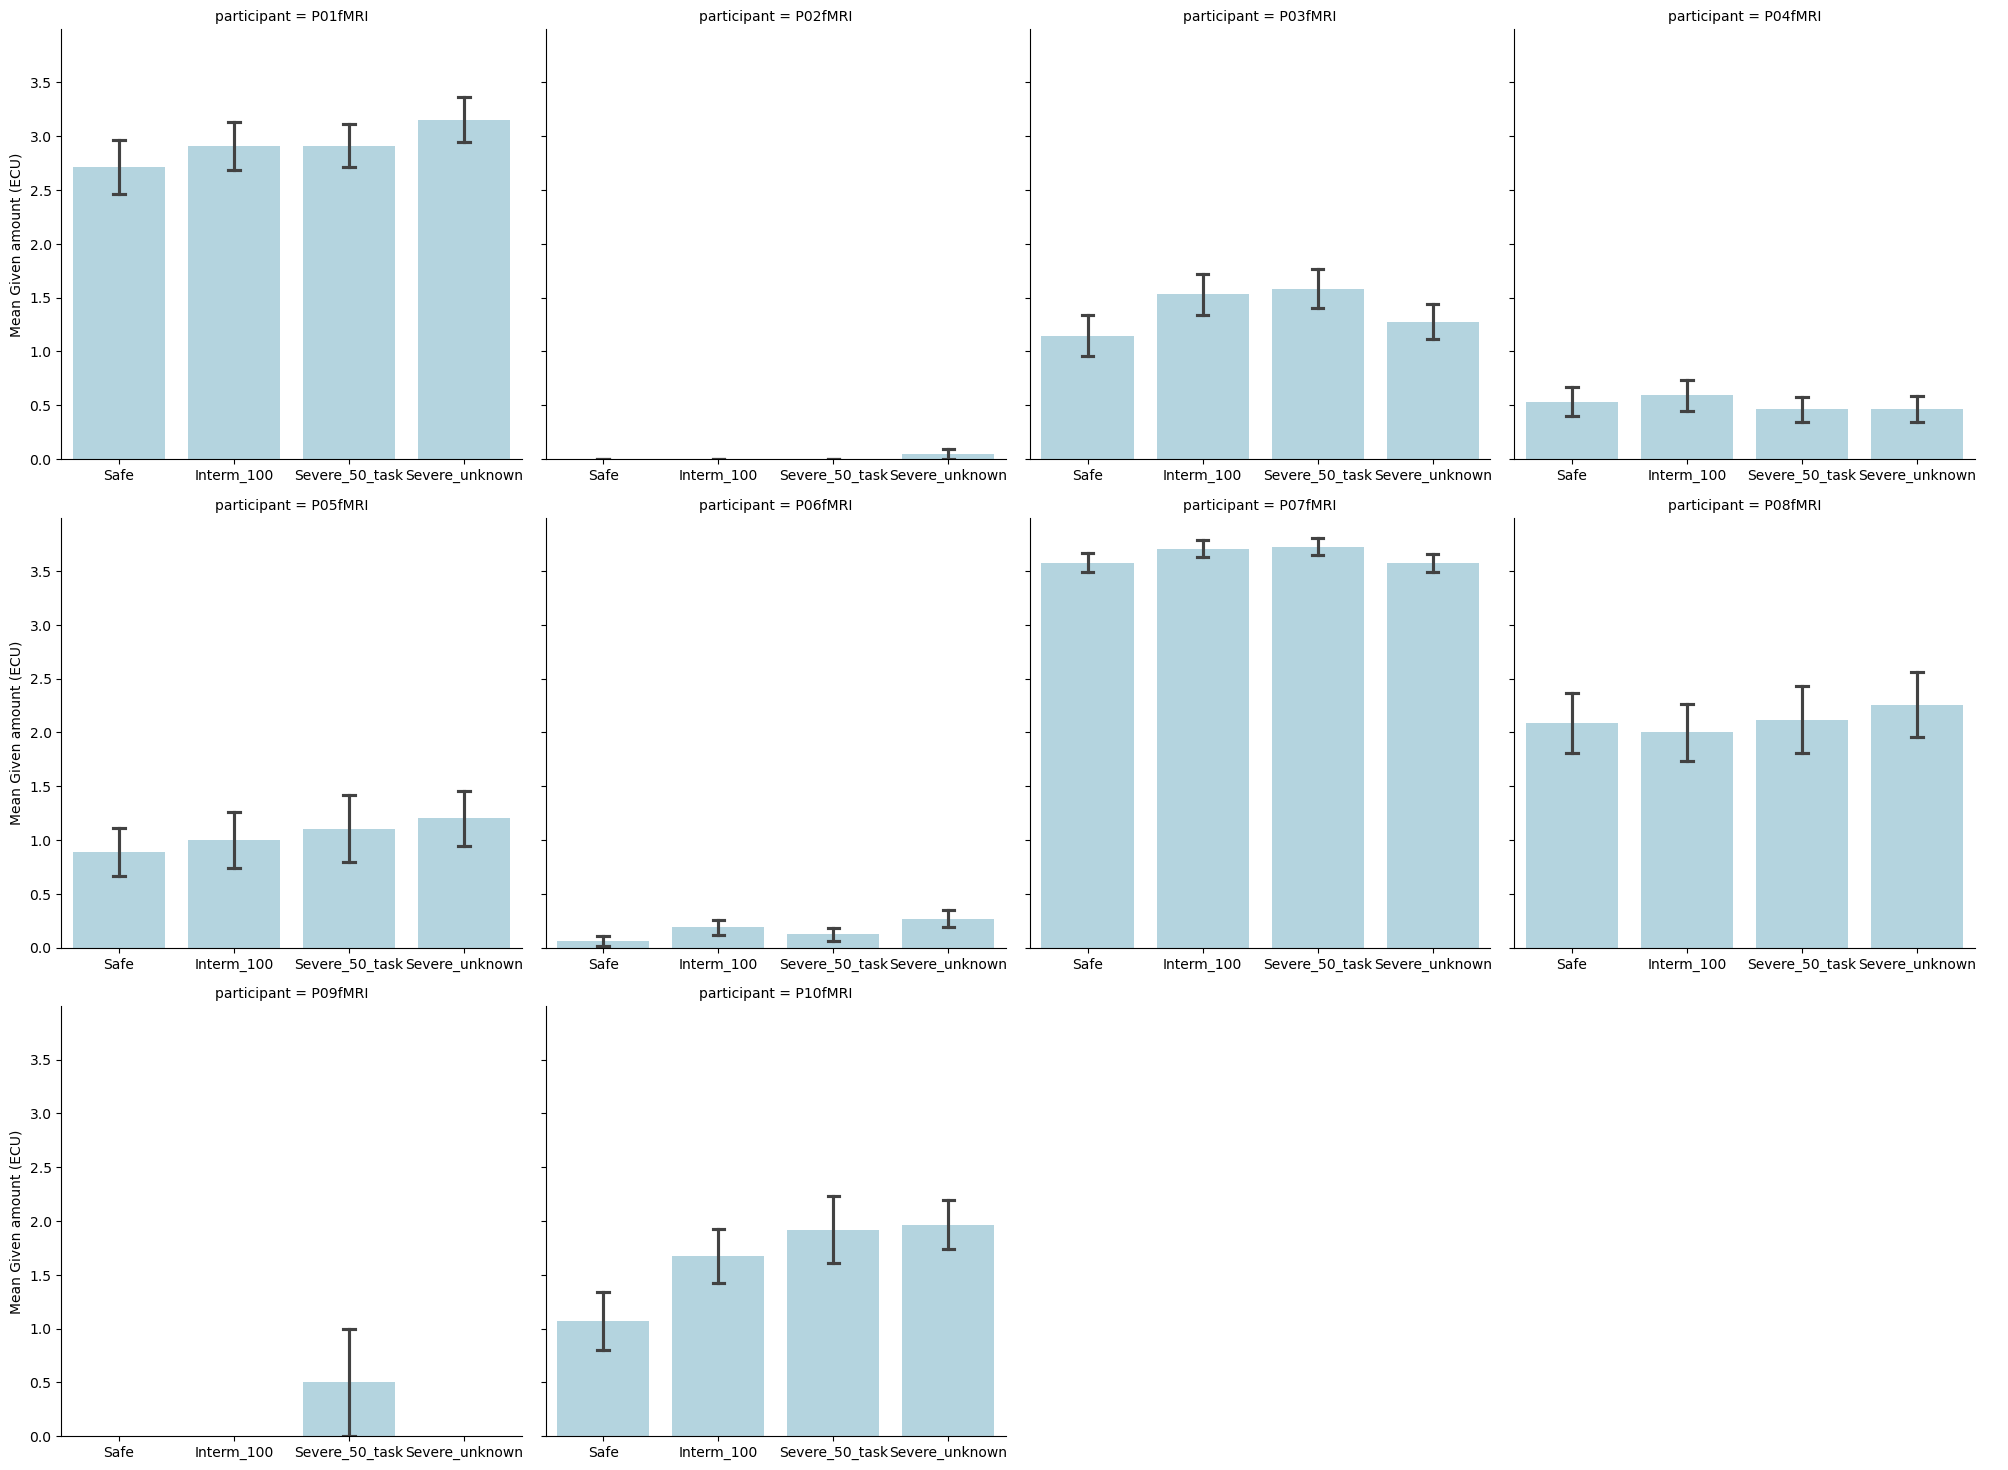

In [259]:
##Change in responses across runs
##counting individual responses based on pressed button/given amount 
ax = sns.catplot(data=df.sort_values('participant'), kind = 'bar',
            col='participant', x = 'cond_name', y = 'given', col_wrap=4, sharey = True, sharex = False, 
            capsize=.1, estimator='mean', color = 'lightblue', errorbar = 'se',order=['Safe','Interm_100','Severe_50_task','Severe_unknown'])
ax.set_xlabels('')
ax.set_ylabels('Mean Given amount (ECU)')


Shapiro - population test for given: W = 0.9540, p_value = 0.7659

Shapiro - population test for SCR: W = 0.7564, p_value = 0.0148

Spearman correlation: -0.1429, p_value: 0.7599


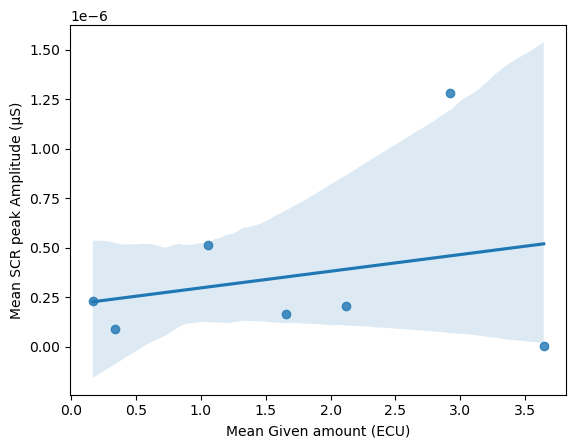

In [260]:
##Correlation of given amount and SCR (average) when the participant is informed about the condition. 
data_corr = df.groupby(['participant'], as_index=False)[['given','SCR_Peak_Amplitude']].mean().dropna()
# Plot regplot for 'Safe' condition
ax = sns.regplot(x='given', y='SCR_Peak_Amplitude', data=data_corr)
ax.set_xlabel('Mean Given amount (ECU)') #ECU: Experimental Currency Units
ax.set_ylabel('Mean SCR peak Amplitude (µS)')

##assesing assumptions and correlation between given and SCR
stat, p_value = shapiro(data_corr['given'])
print(f"\nShapiro - population test for given: W = {stat:.4f}, p_value = {p_value:.4f}")
stat, p_value = shapiro(data_corr['SCR_Peak_Amplitude'])
print(f"\nShapiro - population test for SCR: W = {stat:.4f}, p_value = {p_value:.4f}")

correlation, p_value = spearmanr(data_corr['given'], data_corr['SCR_Peak_Amplitude'])
print(f"\nSpearman correlation: {correlation:.4f}, p_value: {p_value:.4f}")
##The p_value for the correlation is 0.7599, which is very high. 
#This means that the observed negative correlation is not statistically significant. 
#With the small sample size, we cannot confidently conclude that there is a true negative correlation 
#between our variables in the larger population.
#Discrepacny between slope and correlation coeficient coeficient is likely due to the small sample size. 